# TASK #2: MOUNT DRIVE AND IMPORT LIBRARIES/DATASETS

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq" -O train.p && rm -rf /tmp/cookies.txt
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zJxB1YzBYuImaHBSxWGN-ZXPDRYN_CTX' -O valid.p
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jZhZpEZkYFaaPPAwfd1cB8e-FK0aoeC0' -O test.p

--2020-09-29 09:21:20--  https://docs.google.com/uc?export=download&confirm=Pb6o&id=1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq
Resolving docs.google.com (docs.google.com)... 108.177.119.113, 108.177.119.139, 108.177.119.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-4o-docs.googleusercontent.com/docs/securesc/usblr9kquiq6svlfo0pkefm2gqlufd1l/4ifvk09n1jlati1hmatehuv2psamhl9n/1601371275000/17242455652310080862/10433750111559228706Z/1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq?e=download [following]
--2020-09-29 09:21:20--  https://doc-00-4o-docs.googleusercontent.com/docs/securesc/usblr9kquiq6svlfo0pkefm2gqlufd1l/4ifvk09n1jlati1hmatehuv2psamhl9n/1601371275000/17242455652310080862/10433750111559228706Z/1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq?e=download
Resolving doc-00-4o-docs.googleusercontent.com (doc-00-4o-docs.googleusercontent.com)... 173.194.79.132, 2a00:1450:4013:c05::84
Connec

In [3]:
with open("/content/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

TRAINING DATASET SHAPE

In [5]:
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

VALIDATION DATSET SHAPE

In [6]:
X_validation.shape, y_validation.shape

((4410, 32, 32, 3), (4410,))

TESTING DATASET SHAPE

In [7]:
X_test.shape, y_test.shape

((12630, 32, 32, 3), (12630,))

PRINTING THE LABELS

In [8]:
y_train

#### WE FIND THAT THE LABELS ARE ALREADY IN NUMERICAL FORMAT

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

# TASK #3: PERFROM IMAGES VISUALIZATION

3

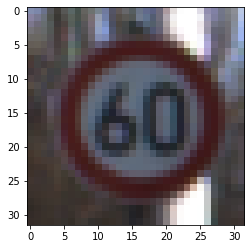

In [9]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

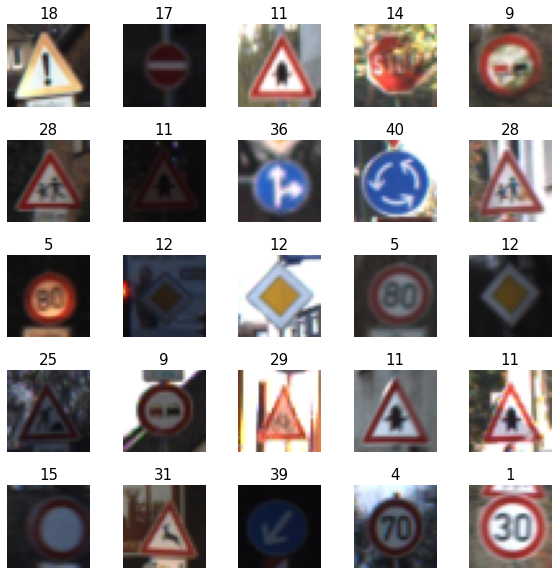

In [10]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [11]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

#Since its an RGB image, so it means that you have add r with g with b and then divide it by 3 to get your desired grayscale image. Its done in this way. If you have an color image like the image shown above and you want to convert it into grayscale using average method.

In [12]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [13]:
X_train_gray.shape


(34799, 32, 32, 1)

In [14]:
X_test_gray.shape


(12630, 32, 32, 1)

In [15]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [16]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

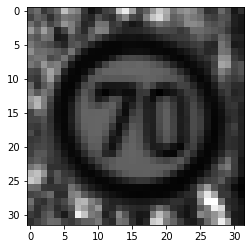

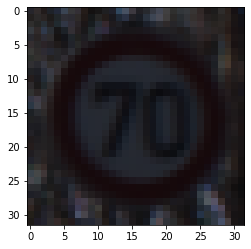

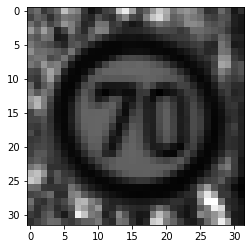

In [17]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

#Building the model

#Use this space for coding

NEW TRAINING DATASET SHAPE

In [18]:
X_train_gray_norm.shape, y_train.shape

((34799, 32, 32, 1), (34799,))

NEW TESTING DATASET SHAPE

In [19]:
X_test_gray_norm.shape, y_test.shape

((12630, 32, 32, 1), (12630,))

NEW VALIDATION DATASET SHAPE

In [20]:
X_validation_gray_norm.shape, y_validation.shape

((4410, 32, 32, 1), (4410,))

IMPORTING LIBRARIES TO BUILD A VGG-16 like NETWORK (First 7 blocks of VGG-16)

In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Input, Flatten, Dense
from tensorflow.keras.models import Sequential

In [22]:
CNN = Sequential()
CNN.add(Input((32, 32, 1)))

CNN.add(Conv2D(16, (3,3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
CNN.add(BatchNormalization(axis=3))
CNN.add(Conv2D(16, (3,3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
CNN.add(BatchNormalization(axis=3))
CNN.add(MaxPooling2D((2,2), strides=2))

CNN.add(Conv2D(32, (3,3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
CNN.add(BatchNormalization(axis=3))
CNN.add(Conv2D(32, (3,3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
CNN.add(BatchNormalization(axis=3))
CNN.add(MaxPooling2D((2,2), strides=2))

CNN.add(Conv2D(64, (3,3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
CNN.add(BatchNormalization(axis=3))
CNN.add(Conv2D(64, (3,3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
CNN.add(BatchNormalization(axis=3))
CNN.add(MaxPooling2D((2,2), strides=2))

CNN.add(Flatten())
CNN.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
CNN.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
CNN.add(Dense(43, activation='softmax'))

In [23]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        1

In [24]:
CNN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = CNN.fit(X_train_gray_norm, y_train, validation_data=(X_validation_gray_norm, y_validation), epochs=30, batch_size=64)

Epoch 1/30
544/544 [==============================] - 3s 6ms/step - loss: 0.7430 - accuracy: 0.7959 - val_loss: 0.5354 - val_accuracy: 0.8592
Epoch 2/30
544/544 [==============================] - 3s 5ms/step - loss: 0.0600 - accuracy: 0.9812 - val_loss: 0.3826 - val_accuracy: 0.9039
Epoch 3/30
544/544 [==============================] - 3s 5ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.4470 - val_accuracy: 0.8859
Epoch 4/30
544/544 [==============================] - 3s 5ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.3581 - val_accuracy: 0.9200
Epoch 5/30
544/544 [==============================] - 3s 5ms/step - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.3365 - val_accuracy: 0.9215
Epoch 6/30
544/544 [==============================] - 3s 5ms/step - loss: 0.0271 - accuracy: 0.9914 - val_loss: 0.3293 - val_accuracy: 0.9370
Epoch 7/30
544/544 [==============================] - 3s 5ms/step - loss: 0.0170 - accuracy: 0.9947 - val_loss: 0.1872 - val_accuracy: 0.9558
Epoch 

In [26]:
import matplotlib.pyplot as plt

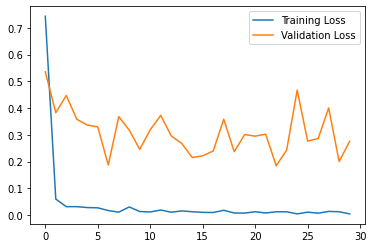

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'], loc='best')
plt.show()

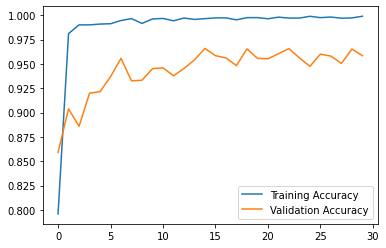

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='best')
plt.show()

In [29]:
predictions = CNN.predict_classes(X_test_gray_norm)
predictions

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([16,  1, 38, ...,  8,  7, 10])

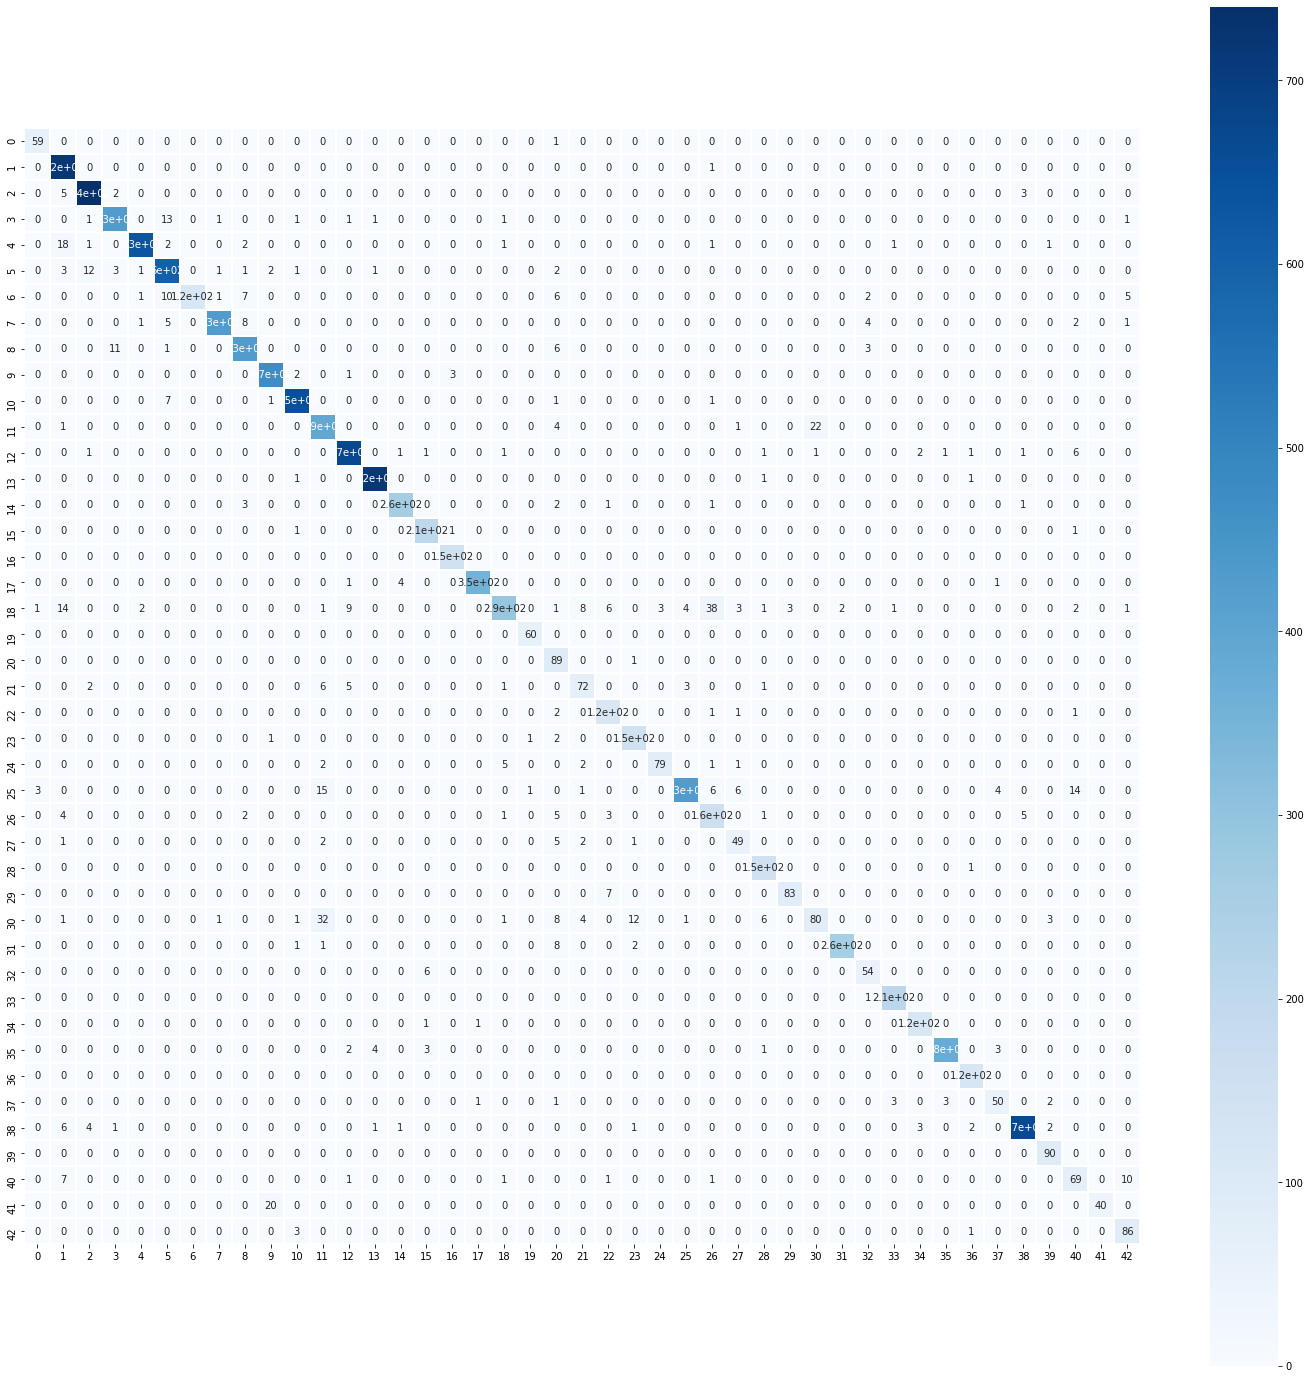

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(25, 25))
cm = confusion_matrix(y_test, predictions)
hm = sns.heatmap(cm, annot=True, square=True, linewidths=1, cmap='Blues')
plt.show(hm)

EVALUATING THE MODEL'S PERFORMANCE ON THE TESTING DATASET

In [31]:
print('Testing Accuracy is : {}'.format(CNN.evaluate(X_test_gray_norm, y_test)[1]))

395/395 [==============================] - 1s 2ms/step - loss: 0.3441 - accuracy: 0.9485
Testing Accuracy is : 0.9485352039337158


# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

#Marks will be given on basis of next code cells results

In [32]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 0.3441 - accuracy: 0.9485
Test Accuracy: 0.9485352039337158


#Attach a screen shot of your results as proof below this cell

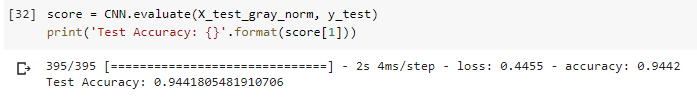

#Other helper functions

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

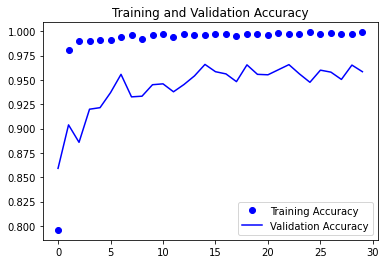

In [35]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

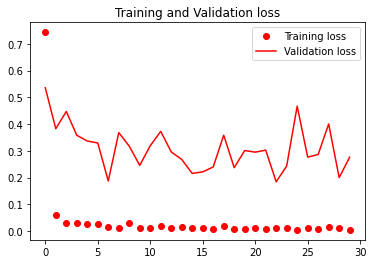

In [36]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [37]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

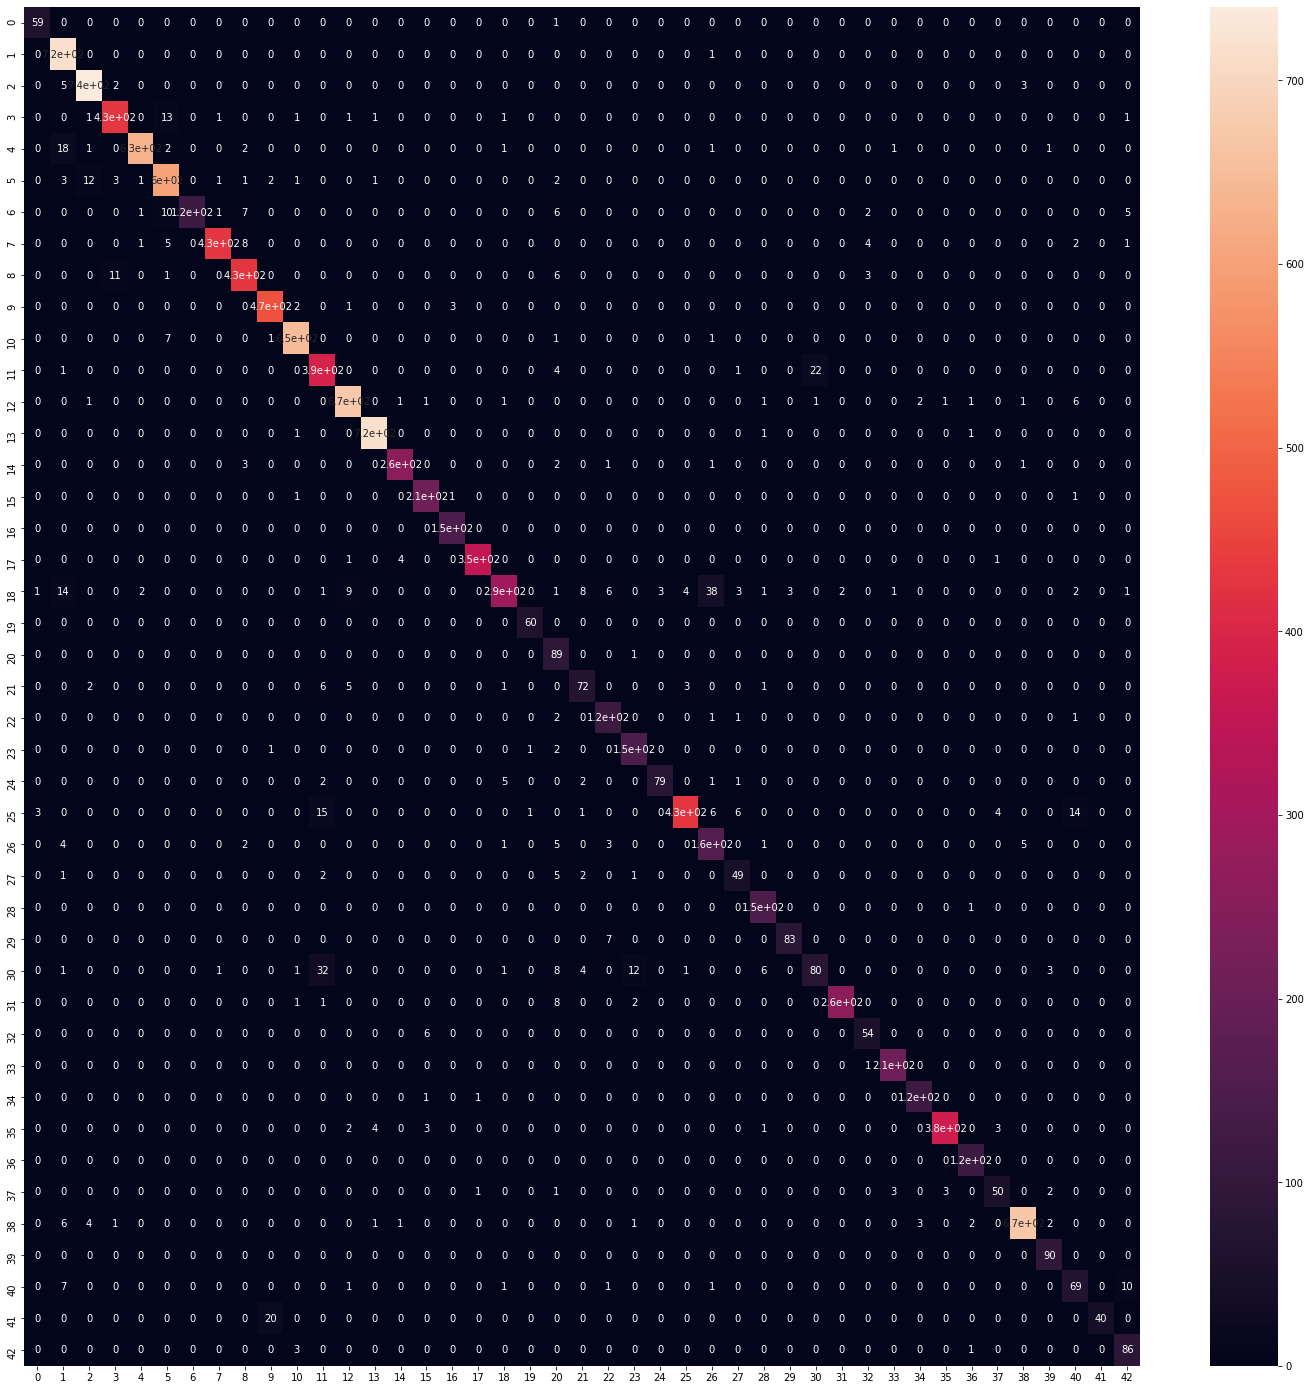

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

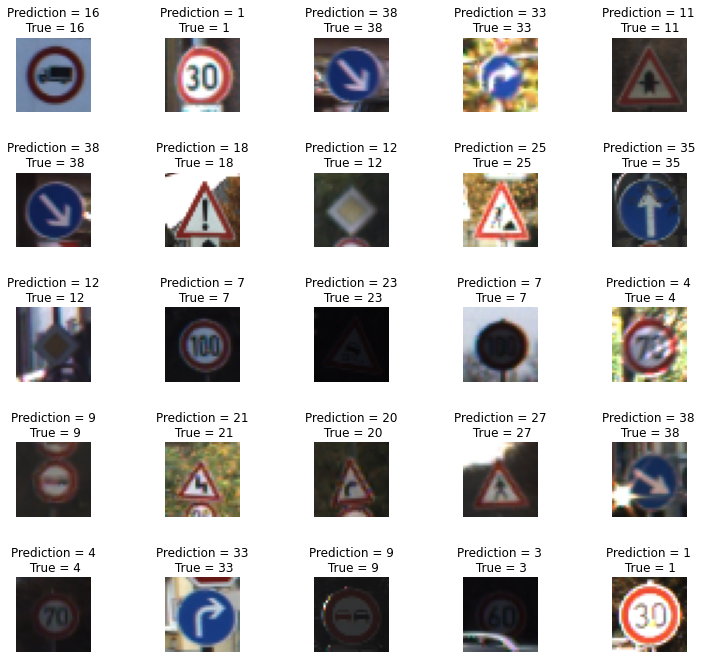

In [39]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    